# Attention Analysis

In [1]:
import pandas as pd
import sys
import pickle
from matplotlib.pyplot import plot, show
import matplotlib.pyplot as plt

sys.path.append("../../dev")
from metrics import *

sys.path.append("../../model")
from model_params import *

## 1) Load Metrics

In [2]:
model_names = [
    "gpt2_xl", 
    "gpt_j", 
    "gpt_neox",
]

metrics = {}
for model in model_names:
    metrics[model] = pd.read_csv(f"../../results/attention/{model}/unnatural.csv")

## 2) False Induction Heads

In [3]:
model_names = [
    "gpt2_xl", 
    "gpt_j", 
    "gpt_neox",
]

In [4]:
for model_name in model_names:
    df = metrics[model_name]
    demo_indx = MODEL_PARAMS[model_name]["max_demos"] - 1
    df = df[(df["demo_indx"] == demo_indx) & (df["prefix_type"] == 1)]
    df = df[["layer_indx", "head_indx", "cfs_lab_prime"]]
    df = df.nlargest(5, "cfs_lab_prime")

    layer_heads = {}
    layers, heads = df["layer_indx"].values, df["head_indx"].values
    for layer, head in zip(layers, heads):
        if layer not in layer_heads:
            layer_heads[layer] = []
        if head not in layer_heads[layer]:
            layer_heads[layer].append(head)

    print(f"*False induction heads for {model_name}*")
    print(layer_heads)

    with open(
        f"../../results/attention/{model_name}/unnatural_false_induction_heads.pkl",
        "wb",
    ) as file:
        pickle.dump(layer_heads, file)

*False induction heads for gpt2_xl*
{19: [18], 21: [3, 20], 26: [22], 24: [11]}
*False induction heads for gpt_j*
{14: [6], 16: [7], 20: [0], 11: [0], 12: [10]}
*False induction heads for gpt_neox*
{23: [54], 21: [63], 19: [54], 13: [40], 24: [41]}


## 3) Sum of Prefix Matching Scores

In [5]:
pm_scores = {}
for model_name in model_names:
    df = metrics[model_name]
    demo_indx = MODEL_PARAMS[model_name]["max_demos"] - 1
    df = df[(df["demo_indx"] == demo_indx) & (df["prefix_type"] == 1)]
    df = df[["layer_indx", "head_indx", "cfs_lab_prime"]]

    score_sum = [0] * (df["layer_indx"].max() + 1)
    for indx, row in df.iterrows():
        score_sum[int(row[0])] += row[2]

    score_sum = [s / (df["head_indx"].max() + 1) for s in score_sum]
    pm_scores[model_name] = score_sum

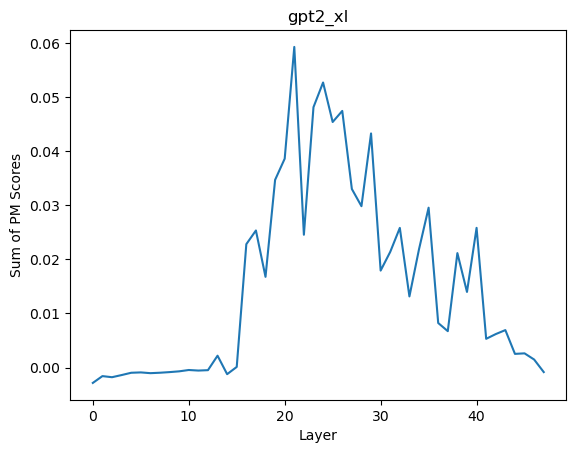

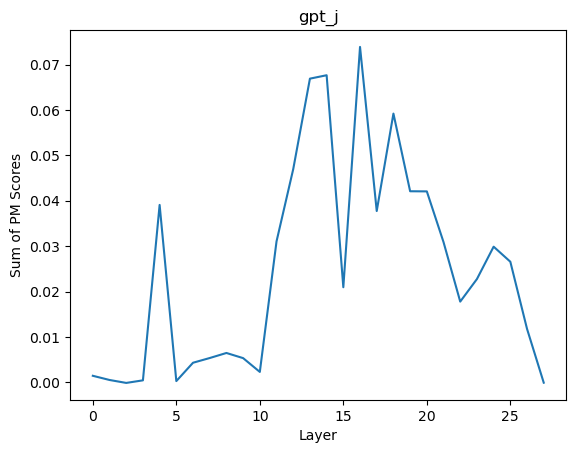

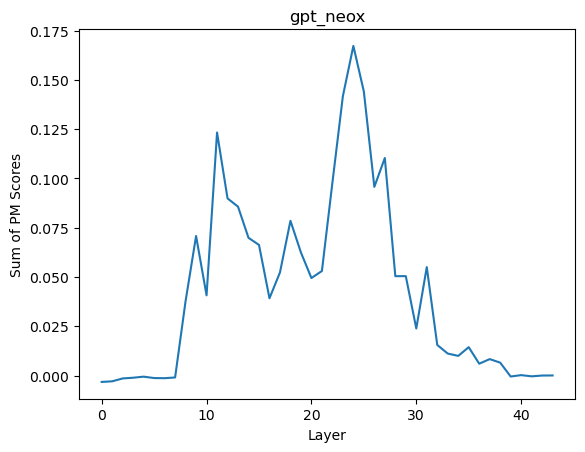

In [6]:
for model, scores in pm_scores.items():   
    x = range(len(scores))
    plt.plot(x, scores)
    plt.xlabel('Layer')
    plt.ylabel('Sum of PM Scores')
    plt.title(model)
    plt.show()